In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import src.funciones as func


In [2]:
#Importing .csv files
l_items = "input/20191226-items.csv"
l_reviews = "input/20191226-reviews.csv"
items = func.import_df(l_items)
reviews = func.import_df(l_reviews)

In [3]:
#Display DF
func.show_df(items,3)
func.show_df(reviews,3)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0


In [4]:
#Revising null and wrong items
items.info()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4   image          720 non-null    object 
 5   rating         720 non-null    float64
 6   reviewUrl      720 non-null    object 
 7   totalReviews   720 non-null    int64  
 8   price          720 non-null    float64
 9   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 56.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986

In [6]:
#Deleting empty values for "items" in "price" and "originalPrice"
items["precios_0"] = items.price + items.originalPrice
func.delete_by(items, "precios_0",0)
#Deleting one model with wrong price
func.delete_by(items, "price",1)

In [72]:
#Deleting non verified votes for "reviews" in "verified".
func.delete_by(reviews, "verified",False)
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
14,B0009N5L7K,Marcel Thomas,1,"March 5, 2016",True,Stupid phone,DON'T BUY OUT OF SERVICE,NaN
17,B0009N5L7K,Stephen Cahill,1,"December 20, 2016",True,Phones locked,1 star because the phones locked so I have to ...,NaN
18,B0009N5L7K,Mihir,5,"December 13, 2009",True,Excellent product,The product has been very good. I had used thi...,NaN
21,B000SKTZ0S,Thomas,4,"September 17, 2010",True,"Nice, but",I bought this phone to replace an LG phone tha...,NaN
22,B000SKTZ0S,"Kei, San Jose, CA",1,"May 13, 2017",True,It seems it doesn't work with the existing AT&...,I purchased this phone for my AT&T phone repla...,NaN


In [64]:
#Creating a new df including the columns from items which will be used for the analysis
itera = items[["asin","brand","title","image","url","price","totalReviews"]]
#Changing some column names
itera = itera.rename(columns={"brand":"Brand","price":"Price","totalReviews":"Sales"})

In [65]:
#Calculate the mean of ratings in "review" and including it in "itera"
x=reviews.groupby("asin").mean("rating")["rating"].reset_index()
itera = itera.merge(x, on="asin").reset_index()


In [66]:
#Inserting a column "model" from "title"    
x =[]
for i in itera["title"]:
    x.append(i[0:20])
itera.insert(loc=3, column="Model", value= x)
itera.head(3)

,index,asin,Brand,Model,title,image,url,Price,Sales,rating
0,0,B0009N5L7K,Motorola,Motorola I265 phone,Motorola I265 phone,https://m.media-amazon.com/images/I/419WBAVDAR...,https://www.amazon.com/Motorola-i265-I265-phon...,49.95,7,2.333333
1,1,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://m.media-amazon.com/images/I/71b+q3ydkI...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,99.99,22,2.800000
2,2,B001DCJAJG,Motorola,Motorola V365 no con,Motorola V365 no contract cellular phone AT&T,https://m.media-amazon.com/images/I/61LYNCVrrK...,https://www.amazon.com/Motorola-V365-contract-...,149.99,12,3.750000


In [67]:
#showing every row with NaN values
func.show_empty(itera)
#deleting 3 asins with no brand
itera.dropna(inplace=True)

# ANALISIS

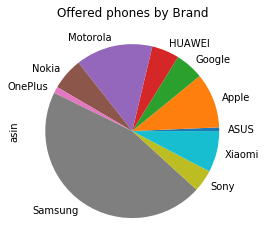

In [68]:
#La marca que más moviles oferta es Samsung
brandBestSeller = itera.groupby("Brand").count()["asin"]
brandBestSeller.plot(kind="pie",title="Offered phones by Brand")

,Model,Sales
15,Nokia Lumia 900 Blac,929
529,Samsung Galaxy A20 U,915
225,Samsung Galaxy Note,891
313,Samsung Galaxy Note,873
540,Motorola G6 – 32 GB,836
60,Samsung Galaxy Note,799
66,Samsung Galaxy Note,799
155,Samsung Galaxy S8+ 6,793
75,Samsung Galaxy S7 Ed,783
36,Moto G - Verizon Pre,773


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

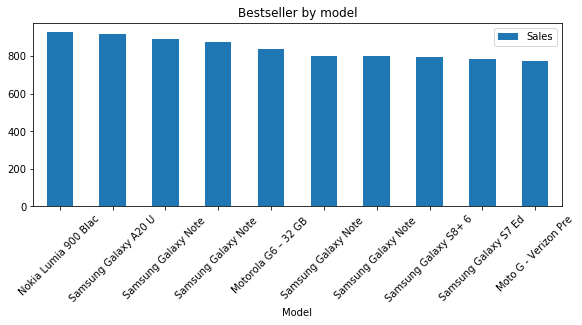

In [69]:
#Modelos más vendido(modelo con más opiniones validas) y menos
modelBestSeller = itera[["Model","Sales"]].sort_values("Sales",ascending=False).head(10)
display(modelBestSeller)
modelBestSeller.plot(kind="bar",x="Model", y="Sales",figsize=(8, 5),title="Bestseller by model")
plt.tight_layout() 
plt.xticks(rotation=45) 



,Brand,Sales
0,Samsung,267
1,Motorola,84
2,Apple,60
3,Xiaomi,45
4,Nokia,35
5,Google,31
6,HUAWEI,30
7,Sony,24
8,OnePlus,7
9,ASUS,4


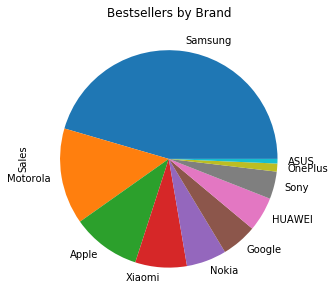

In [103]:
brandBestSeller = itera.groupby("Brand").count().sort_values("Sales",ascending=False)["Sales"]
display(brandBestSeller.reset_index())
brandBestSeller.plot(kind="pie",title="Bestsellers by Brand", figsize=(10,5))

,Model,rating
158,Nokia 3.1 4G LTE Dua,5.0
349,Total Wireless Samsu,5.0
213,Samsung Galaxy A30 S,5.0
32,"Apple iPhone X, 64GB",5.0
242,Samsung Galaxy J7 V,5.0
364,Xiaomi Mi 9 Lite 64G,5.0
87,Huawei Y7 2019 DUB-L,5.0
310,"Samsung Gusto, Black",5.0
373,Xiaomi Mi Note 10 12,5.0
354,Verizon Prepaid 4G S,5.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

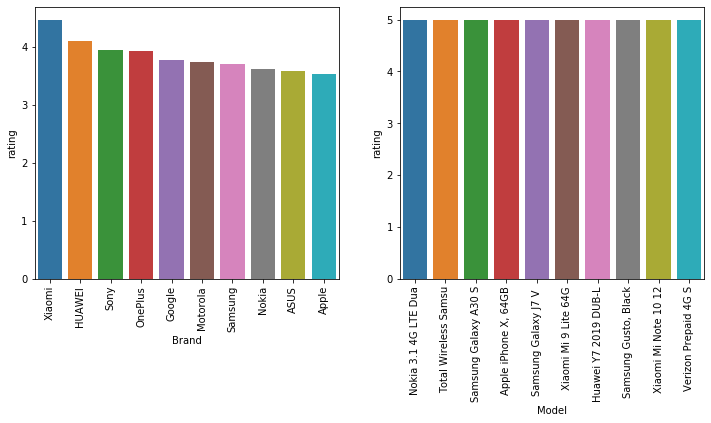

In [106]:
# La marca con mayor grado de satisfacción  
#por modelo
modelSatis = itera.groupby("Model").mean()["rating"].reset_index().sort_values("rating", ascending = False).head(10)
display(modelSatis)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.barplot(x=brandSatis["Brand"],y=brandSatis["rating"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x=modelSatis["Model"],y=modelSatis["rating"])
plt.xticks(rotation=90)

,Brand,rating
9,Xiaomi,4.462116
3,HUAWEI,4.089015
8,Sony,3.935537
6,OnePlus,3.926367
2,Google,3.774232
4,Motorola,3.730108
7,Samsung,3.691225
5,Nokia,3.616965
0,ASUS,3.583599
1,Apple,3.530746


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

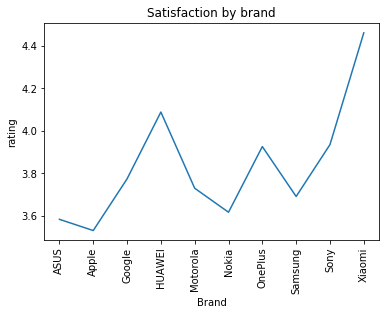

In [108]:
#por marca
brandSatis = itera.groupby("Brand").mean()["rating"].reset_index().sort_values("rating", ascending = False).head(10)
display(brandSatis)
sns.lineplot(x=brandSatis["Brand"],y=brandSatis["rating"]).set_title('Satisfaction by brand')
plt.xticks(rotation=90)

In [15]:
#correlación entre el rating el precio y el número de ventas(reviews) -diagrama de puntos

#h1: existe una relación positiva entre el rating y el precio: falso,relación muy baja (0.10)
rating_price = itera.rating.corr(itera["price"])

#h1: existe una relación positiva entre el rating y el nº de ventas: falso,relación muy baja (0.09)
rating_sells =itera.rating.corr(itera["totalReviews"])

#h1: existe una relación negativa entre el precio y el nº de ventas: falso,relación muy baja(-0,03)
price_sells =itera.price.corr(itera["totalReviews"])

print(rating_price, rating_sells, price_sells)

0.10780854019931084 0.09905100587437254 -0.03450710603998105


[Text(0.5, 1.0, 'Statistics over ratings by brand')]

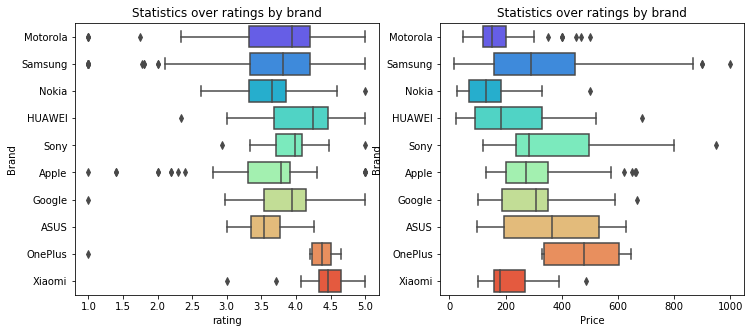

In [120]:
#mayor rating/precio para marca  y luego hacer para modelo
plt.figure(figsize = (12,5))
plt.subplot(1,2,1) 
sns.boxplot(x='rating',y='Brand',data=itera ,palette='rainbow').set(title=f'Statistics over ratings by brand')
plt.subplot(1,2,2)
sns.boxplot(x='Price',y='Brand',data=itera ,palette='rainbow').set(title=f'Statistics over ratings by brand')

,Brand,Model,Price,rating
492,Motorola,Verizon Prepaid 4G S,64.57,5.0
434,HUAWEI,Huawei E8372h-608 Un,79.99,5.0
549,Motorola,Motorola Moto E6 Sma,99.99,5.0
8,Samsung,"Samsung Gusto, Black",99.99,5.0
579,Xiaomi,Xiaomi Redmi 8A (32G,112.98,5.0


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

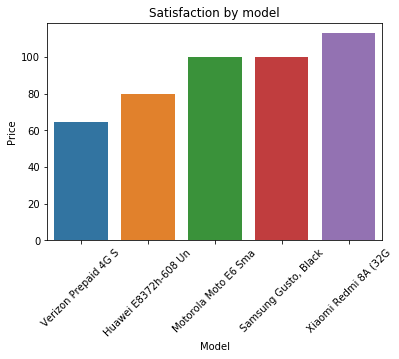

In [116]:
#precio más bajo con mayor rating

display(itera[itera["rating"]==5].sort_values("Price").head(5)[["Brand", "Model","Price","rating",]])
x = itera[itera["rating"]==5].sort_values("Price").head(5)[["Model","Price"]]
sns.barplot(x="Model",y="Price",data=x).set_title('Satisfaction by model')
plt.xticks(rotation=45)

In [101]:
itera.to_csv("/home/jorge-alamillos/ironhack/comparador-automoviles/itera.csv")